# Chapter 4 - Classification: Applied Exercises

In [48]:
# loading required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB,  MultinomialNB # might need different naive Bayes classifier

### Exercise 13

In [2]:
# loading the data

weekly = pd.read_csv('data/Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# replace down with 0 / up with 1 

weekly.Direction.replace(('Up', 'Down'), (1,0), inplace=True)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


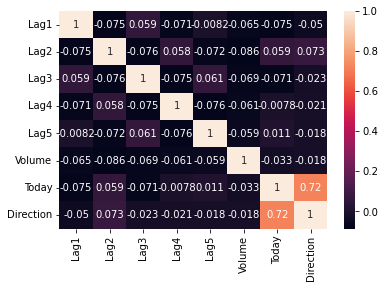

In [36]:
# a) numerical and graphical summaries of the Weekly data

corrMatrix = weekly.iloc[:,1:9].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [37]:
weekly.iloc[:,1:9].describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


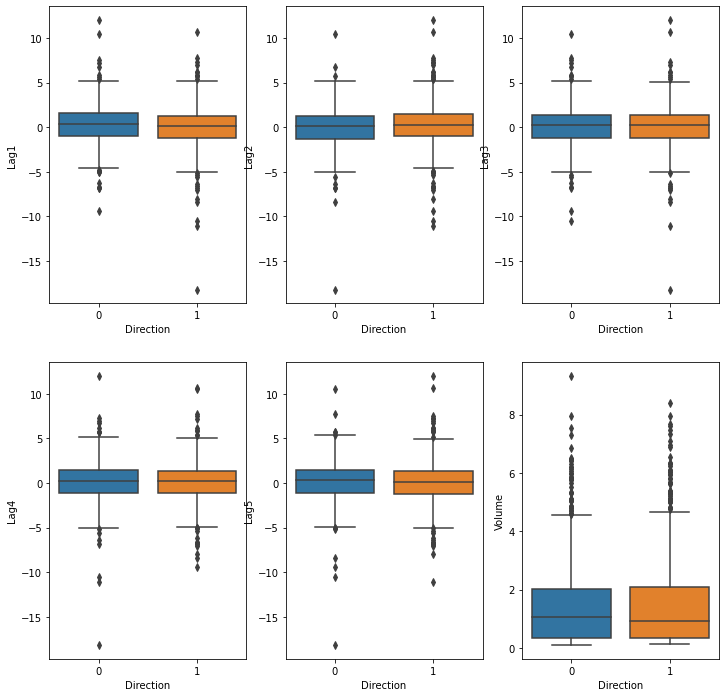

In [35]:
variables = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,12))

for variable, ax in zip(variables, axs.flatten()):
    sn.boxplot(x='Direction', y=variable, data=weekly, ax=ax)



In [38]:
# b) logistic regression - 'Direction' as response variable

y = weekly['Direction']
X = weekly.iloc[:,1:7].to_numpy()

logReg = LogisticRegression(penalty='none').fit(X, y)

coef_names = ['Intercept']
[coef_names.append(i) for i in weekly.columns.tolist()[1:7]]

coef_values = [logReg.intercept_[0]]
[coef_values.append(i) for i in logReg.coef_[0]]

coefs = dict(zip(coef_names, coef_values))
 
for key, value in coefs.items():
    print(key, ': ', value)
    
# -> Coefficients match values in R; sklearn can't output p-values -> use statsmodels instead?

Intercept :  0.26686253113360625
Lag1 :  -0.04126770929816426
Lag2 :  0.05844168587826125
Lag3 :  -0.016061844895620778
Lag4 :  -0.027789283573854576
Lag5 :  -0.014474213744064535
Volume :  -0.022741218761658247


In [13]:
# logReg using statsmodels

import statsmodels.api as sm

X2 = sm.add_constant(X)

logReg2 = sm.Logit(y, X2).fit()
print(logReg2.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                0.006580
Time:                        10:44:55   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
x1            -0.0413      0.

Only the intercept and Lag2 are statistically significant at $\alpha = 0.05$.

In [54]:
# c) confusion matrix / correct predictions

y_pred = logReg.predict(X)

def model_eval(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    correctly_classified = cm[0][0] + cm[1][1]
    total = np.sum(cm)
    percentage = round(correctly_classified/total*100, 4)

    print('Correctly classified values in percent:\t' + str(percentage) +'%')
    
model_eval(y, y_pred)

[[111 373]
 [114 491]]
Correctly classified values in percent:	55.2801%


In [55]:
# d) logistic regression (train/test split)

trainData = weekly[(weekly['Year'] >= 1990) & (weekly['Year'] <= 2008)]
testData = weekly[(weekly['Year'] >= 2009) & (weekly['Year'] <= 2010)]

y_train = trainData['Direction']
y_test = testData['Direction']

X_train = trainData.iloc[:,1:7]
X_test = testData.iloc[:,1:7]

# fitting the model

logReg = LogisticRegression(penalty='none').fit(X_train, y_train)

# predicting test Values

y_pred = logReg.predict(X_test)
    
model_eval(y_test, y_pred)

[[31 12]
 [44 17]]
Correctly classified values in percent:	46.1538%


In [56]:
# e) LDA

LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_predLDA = LDA.predict(X_test)

model_eval(y_test, y_predLDA)

[[31 12]
 [44 17]]
Correctly classified values in percent:	46.1538%


In [57]:
# f) QDA

QDA = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

y_predQDA = QDA.predict(X_test)

model_eval(y_test, y_predQDA)

[[33 10]
 [49 12]]
Correctly classified values in percent:	43.2692%


In [58]:
# g) KNN

KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_predKNN = KNN.predict(X_test)

model_eval(y_test, y_predKNN)

[[21 22]
 [32 29]]
Correctly classified values in percent:	48.0769%


In [59]:
# h) naive Bayes

NB_B = BernoulliNB().fit(X_train, y_train)

y_pred_NB_B = NB_B.predict(X_test)

model_eval(y_test, y_pred_NB_B)

[[12 31]
 [14 47]]
Correctly classified values in percent:	56.7308%


i) Naive Bayes performs the best on this dataset.


In [13]:
# j) experiment: Different combinations of predictors / transformations / interactions for each of the methods

# train / test splot with CV
# KNN -> different number of neighbors
# penalties logistic regression

### Exercise 14

In [61]:
# loading the data

auto = pd.read_csv('data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [63]:
# a) create binary variable 'mpg01'
auto['mpg01'] = np.where(auto['mpg'] >= auto['mpg'].median(), 1, 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


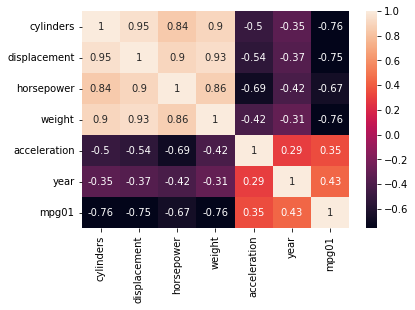

In [67]:
# b) explore the data graphically

corrMatrix = auto.iloc[:, np.r_[1:7, 9]].corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

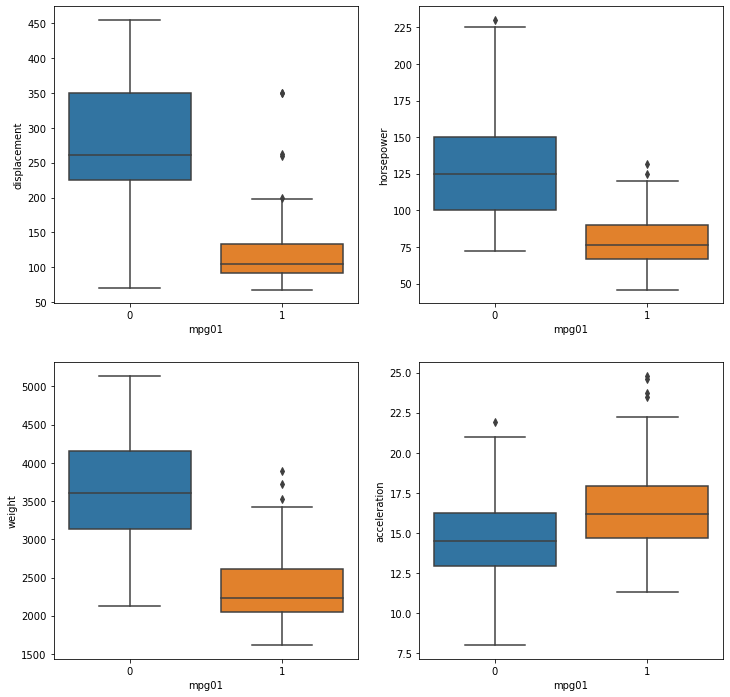

In [69]:
variables = auto.columns.tolist()[2:6]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

for variable, ax in zip(variables, axs.flatten()):
    sn.boxplot(x='mpg01', y=variable, data=auto, ax=ax)

In [70]:
# c) Split the data into a train / test set

X = auto.iloc[:,1:5]
y = auto['mpg01']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
# d) LDA -> test error?

LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_predLDA = LDA.predict(X_test)

def error_rate(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    correctly_classified = cm[0][0] + cm[1][1]
    total = np.sum(cm)
    percentage = correctly_classified/total*100
    error_rate = round(100 - percentage, 4)

    print('Error rate in percent:\t' + str(error_rate) +'%')
    
error_rate(y_test, y_predLDA)

[[52 18]
 [ 2 58]]
Error rate in percent:	15.3846%


In [74]:
# e) QDA -> test error?

QDA = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

y_predQDA = QDA.predict(X_test)

error_rate(y_test, y_predQDA)

[[52 18]
 [ 3 57]]
Error rate in percent:	16.1538%


In [75]:
# f) logistic regression -> test error?

logReg = LogisticRegression(penalty='none').fit(X_train, y_train)

y_predLR = logReg.predict(X_test)

error_rate(y_test, y_predLR)

[[50 20]
 [ 2 58]]
Error rate in percent:	16.9231%


In [76]:
# g) naive Bayes -> test error?

NB_B = BernoulliNB().fit(X_train, y_train)

y_pred_NB_B = NB_B.predict(X_test)

error_rate(y_test, y_pred_NB_B)

[[ 0 70]
 [ 0 60]]
Error rate in percent:	53.8462%


In [82]:
# h) KNN -> test error? Which value of K performs the best on the data set?

for k in range(1,9):
    print(f'k = {k}')
    KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    y_predKNN = KNN.predict(X_test)

    error_rate(y_test, y_predKNN)

k = 1
[[53 17]
 [ 3 57]]
Error rate in percent:	15.3846%
k = 2
[[57 13]
 [ 6 54]]
Error rate in percent:	14.6154%
k = 3
[[52 18]
 [ 1 59]]
Error rate in percent:	14.6154%
k = 4
[[53 17]
 [ 3 57]]
Error rate in percent:	15.3846%
k = 5
[[49 21]
 [ 1 59]]
Error rate in percent:	16.9231%
k = 6
[[50 20]
 [ 1 59]]
Error rate in percent:	16.1538%
k = 7
[[48 22]
 [ 1 59]]
Error rate in percent:	17.6923%
k = 8
[[48 22]
 [ 1 59]]
Error rate in percent:	17.6923%


Use k = 2 or k = 3

### Exercise 15

In [23]:
# a) Power() function -> 2^3 and print result

def Power():
    print(2**3)
    
Power()

8


In [24]:
# b) Power2() function -> x^a print result

def Power2(x, a):
    print(x**a)

Power2(3, 8)

6561


In [25]:
# c) compute 10^3, 8^17, 131^3 using Power2()

Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

1000
2251799813685248
2248091


In [26]:
# d) Power3() function -> x^a return result

def Power3(x, a):
    return x**a

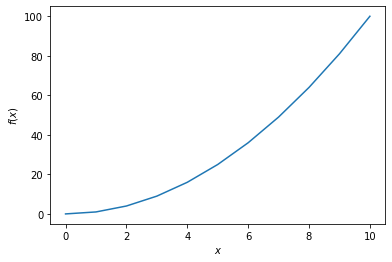

In [27]:
# e) create plot for f(x)=x^2 with Power3(); x-axis 1-10, y-axis x^2

x = list(range(11))
y = [Power3(i, 2) for i in x]

plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

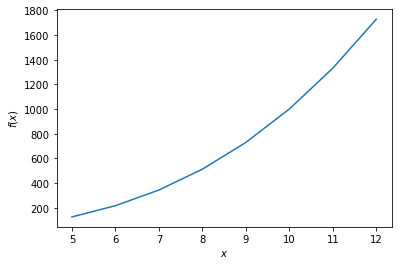

In [29]:
# f) PlotPower() function -> create plot of x agains x^a for a fixed a and range of values of x

def PlotPower(x1, x2, a):
    x = []
    for i in range(x1, x2+1):
        x.append(i)
        
    y = [i**a for i in x]
    
    plt.plot(x,y)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()

# example
PlotPower(5, 12, 3)

### Exercise 16

In [85]:
# loading the data

boston = pd.read_csv('data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [86]:
# binary variable

boston['crim01'] = np.where(boston['crim'] >= boston['crim'].median(), 1, 0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


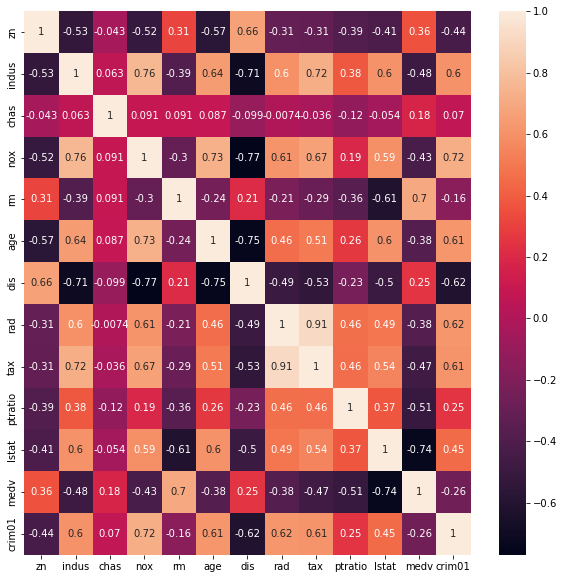

In [89]:
corrMatrix = boston.iloc[:, 1:].corr()

fig, ax = plt.subplots(figsize=(10,10))   
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [91]:
X = boston.iloc[:, np.r_[1,2,4,6:10,11]]
y = boston['crim01']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
model_names = ['LR', 'LDA', 'NB', 'KNN: k=1', 'KNN: k=2', 'KNN: k=3', 'KNN: k=4', 'KNN: k=5']

classifiers = [LogisticRegression(penalty='none', max_iter=1000), 
              LinearDiscriminantAnalysis(), 
              BernoulliNB(), 
              KNeighborsClassifier(n_neighbors=1),
              KNeighborsClassifier(n_neighbors=2),
              KNeighborsClassifier(n_neighbors=3),
              KNeighborsClassifier(n_neighbors=4),
              KNeighborsClassifier(n_neighbors=5)]

for name, classifier in zip(model_names, classifiers):
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    error_rate(y_test, y_pred)


LR
[[72 12]
 [21 62]]
Error rate in percent:	19.7605%
LDA
[[81  3]
 [28 55]]
Error rate in percent:	18.5629%
NB
[[36 48]
 [ 3 80]]
Error rate in percent:	30.5389%
KNN: k=1
[[78  6]
 [ 9 74]]
Error rate in percent:	8.982%
KNN: k=2
[[83  1]
 [15 68]]
Error rate in percent:	9.5808%
KNN: k=3
[[81  3]
 [12 71]]
Error rate in percent:	8.982%
KNN: k=4
[[81  3]
 [13 70]]
Error rate in percent:	9.5808%
KNN: k=5
[[79  5]
 [13 70]]
Error rate in percent:	10.7784%
